<h2 style="color:darkred;font-size:25px">Projet 6 : Classifiez automatiquement des biens de consommation</h2>

<img src="support\logo.png" style="width: 350px;"/>

<h2 style="color:darkred;font-size:25px">Notebook 2 : Computer Vision via SIFT et ORB</h2>

---
---
---

### Téléchargement du jeux de données

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud

import cv2 # open CV

In [2]:
# quelques arrangements pour jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {
    'family': 'Arial',
    'color': 'darkred',
    'weight': 'bold',
    'size': 15,
}

In [3]:
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [9]:
data["product_category_tree"][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [14]:
categories = data['product_category_tree'].str.split('>>', expand=True)
categories.head(5)

,0,1,2,3,4,5,6
0,"[""Home Furnishing",Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,"[""Baby Care",Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,"[""Home Furnishing",Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,"[""Home Furnishing",Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

### Ajout de la catégorie principale :

In [4]:
data['categorie_1'] = data['product_category_tree'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

# 3. Préparation d'ensemble des images

In [5]:
# from os import listdir

path = "/Users/fyasar/Desktop/P6/images/"
list_photos = data['image'].tolist()

# list_photos = [file for file in listdir(path)]
# --> Au cas où on n'a pas de la colonne pour le lien de fichiers

print(len(list_photos))

1050


In [6]:
# Affichange des images


def show_image(the_image, taille):
    """ Il faut d'abord charger l'image avec PIL :
        the_image = Image.open(path + "nom")
    """
    plt.figure(figsize=(taille, taille))
    plt.imshow(the_image)
    plt.axis('off')
    print("La taille de l'image est {}. ".format(the_image.size))
    return plt.show()

La taille de l'image est (999, 1100). 


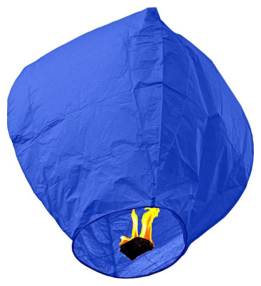

In [7]:
# Charger l'image
image_premiere = Image.open(path + "0a3b5fdf77a361c2d7d9b29c259b8c4e.jpg") 

# Afficher l'image chargée
show_image(image_premiere, 5)

La taille de l'image est (982, 729). 


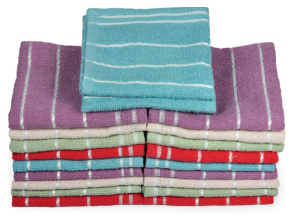

In [8]:
# deuxième photo :

image_deux = Image.open(path + list_photos[2]) 
show_image(image_deux, 5)

La taille de l'image est (3600, 3600). 


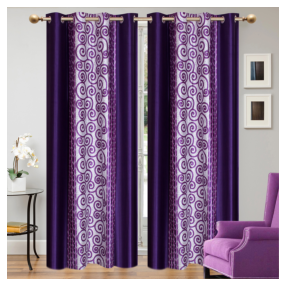

In [9]:
une_autre = Image.open(path + '55b85ea15a1536d46b7190ad6fff8ce7.jpg')
show_image(une_autre, 5)

## Affichage d'exemples d'images par label

Home Furnishing


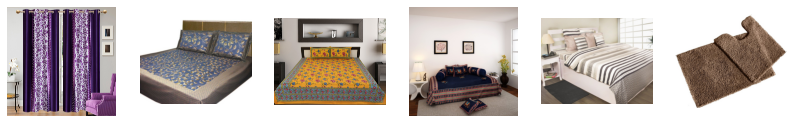

Baby Care


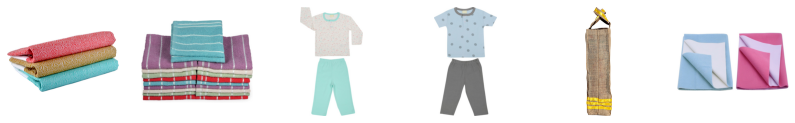

Watches


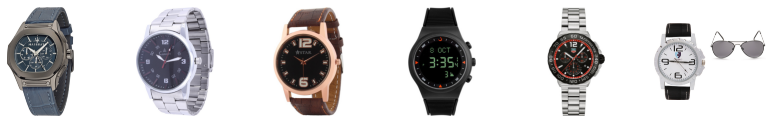

Home Decor


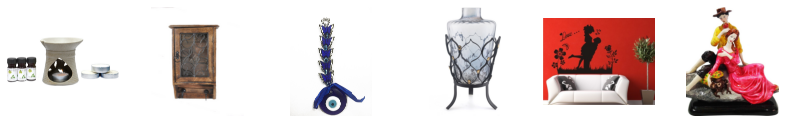

Kitchen


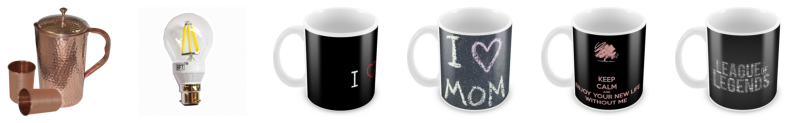

Beauty and Personal Care


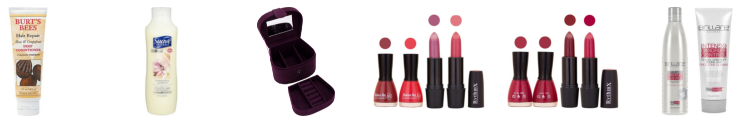

Computers


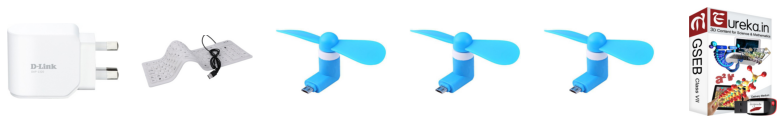

In [10]:
from matplotlib.image import imread

list_labels = data['categorie_1'].unique()

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data)) if data["categorie_1"][i]==name]
    return list_image_name

list_home_furnishing=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Home Furnishing"]
list_baby=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Baby Bath & Skin"]
list_watches=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Watches"]
list_decor=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Home Decor"]
list_kitchen=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Kitchen"]
list_beauty=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Beauty and Personal Care"]
list_computers=[list_photos[i] for i in range(len(data)) if data["categorie_1"][i]=="Computers"]

for name in list_labels :
    print(name)
    print("===================" * 5)
    for i in range(6):
        plt.figure(1, figsize=(14,2))
        plt.subplot(160 + 1+i)
        filename = path + list_fct(name)[i]
        image = imread(filename)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# 4. L'algorithme SIFT (Scale-invariant feature transform)
---
---
Documentation OPENCV : https://docs.opencv.org/3.4/index.html

<img src="support\open_cv_logo.png" style="width: 150px;"/>

Documentation SIFT : https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

## 4.1. Détermination et affichage des descripteurs SIFT

* Chaque descripteur est un vecteur de longueur 128

La taille de l'image est 486540. 


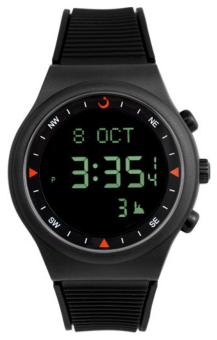

In [11]:
first_image = cv2.imread(path + '41384da51732c0b4df3de8f395714fbb.jpg')

# imread change la couleur puisque mathplotlib utilise RGB
# pour visualiser on met :

first_image_RGB = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
show_image(first_image_RGB, 6)

La taille de l'image est 486540. 


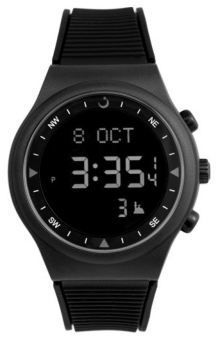

In [12]:
first_image_gray = cv2.imread(path + '41384da51732c0b4df3de8f395714fbb.jpg',
                              cv2.IMREAD_GRAYSCALE)

first_image_gray_RGB = cv2.cvtColor(first_image_gray, cv2.COLOR_BGR2RGB)
show_image(first_image_gray_RGB, 6)

La taille de l'image est 486540. 


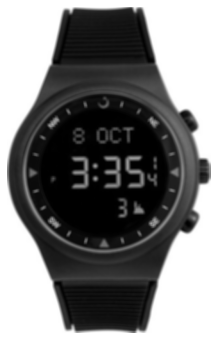

In [13]:
first_image_gauss = cv2.GaussianBlur(first_image_gray, (5, 5), 8)
first_image_gauss = cv2.cvtColor(first_image_gauss, cv2.COLOR_BGR2RGB)

show_image(first_image_gauss, 6)

La taille de l'image est 486540. 


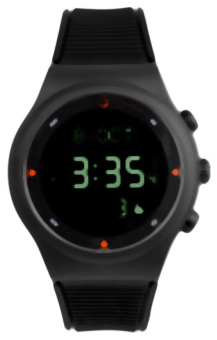

In [14]:
first_image_blur = cv2.medianBlur(first_image, 9)
first_image_blur = cv2.cvtColor(first_image_blur, cv2.COLOR_BGR2RGB)

show_image(first_image_blur, 6)

La taille de l'image est 486540. 


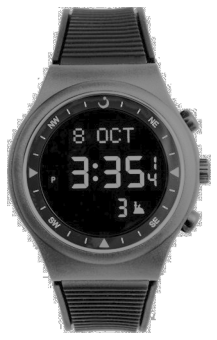

In [15]:
first_image_gray_eq = cv2.equalizeHist(first_image_gray)

first_image_gray_eq_RGB = cv2.cvtColor(first_image_gray_eq, cv2.COLOR_BGR2RGB)
show_image(first_image_gray_eq_RGB, 6)

La taille de l'image est 486540. 


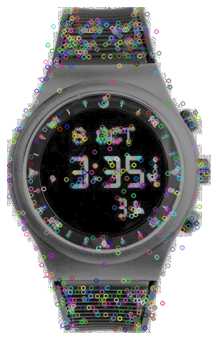

Descripteurs :  (994, 128)

[[ 78.   9.   0. ...   0.   0.   0.]
 [167.  10.   0. ...   0.   0.   0.]
 [ 65.   4.   1. ...   0.   0.   4.]
 ...
 [  1.  53.  66. ...   0.   1.  41.]
 [ 68.   9.   1. ...   1. 113.  53.]
 [ 25. 114.  18. ...   0.   0.   3.]]


In [16]:
sift = cv2.SIFT_create()

first_image_gray = cv2.imread(path + '41384da51732c0b4df3de8f395714fbb.jpg',
                              cv2.IMREAD_GRAYSCALE)
first_image_gray_eq = cv2.equalizeHist(first_image_gray)
first_image_gray_eq = cv2.cvtColor(first_image_gray_eq, cv2.COLOR_BGR2RGB)
kp, des = sift.detectAndCompute(first_image_gray_eq, None)
cv2.drawKeypoints(first_image_gray_eq, kp, first_image_gray_eq)
show_image(first_image_gray_eq, 6)

print("Descripteurs : ", des.shape)
print()
print(des)

## 4.2. Pré-traitement des images via SIFT

#### Filtrage gaussien, contraste, etc.

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

### Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [17]:
image = cv2.imread(path+list_photos[2],0)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
import time

temps1 = time.time()

sift_keypoints = []

sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)):
    if image_num % 100 == 0: print(image_num)
    image = cv2.imread(path + list_photos[image_num], cv2.IMREAD_GRAYSCALE)
    res = cv2.equalizeHist(image)
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1 = time.time() - temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1,
      "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/Users/fyasar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           552.03 secondes


## 4.3. Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [19]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster
# Determination number of clusters
temps1 = time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans_sift = cluster.MiniBatchKMeans(n_clusters=k,
                                      init_size=3 * k,
                                      random_state=0)
kmeans_sift.fit(sift_keypoints_all)

duration1 = time.time() - temps1
print("Temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
Temps de traitement kmeans :            46.33 secondes


## 4.4. Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [20]:
# Creation of histograms (features)
temps1 = time.time()


def build_histogram(kmeans, des, image_num):
    res = kmeans_sift.predict(des)
    hist = np.zeros(len(kmeans_sift.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0: print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(sift_keypoints_by_img):
    if i % 100 == 0: print(i)
    hist = build_histogram(kmeans_sift, image_desc,
                           i)  #calculates the histogram
    hist_vectors.append(hist)  #histogram is the feature vector

im_features_sift = np.asarray(hist_vectors)

duration1 = time.time() - temps1
print("Temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
Temps de création histogrammes :             2.50 secondes


## 4.5 Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [21]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_sift.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_sift = pca.fit_transform(im_features_sift)
print("Dimensions dataset après réduction PCA : ", feat_pca_sift.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 497)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [22]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2,
                     perplexity=30,
                     n_iter=2000,
                     init='random',
                     random_state=6)
X_tsne_sift = tsne.fit_transform(feat_pca_sift)

df_tsne_sift = pd.DataFrame(X_tsne_sift[:, 0:2], columns=['tsne1', 'tsne2'])
df_tsne_sift["class"] = data["categorie_1"]
print(df_tsne_sift.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

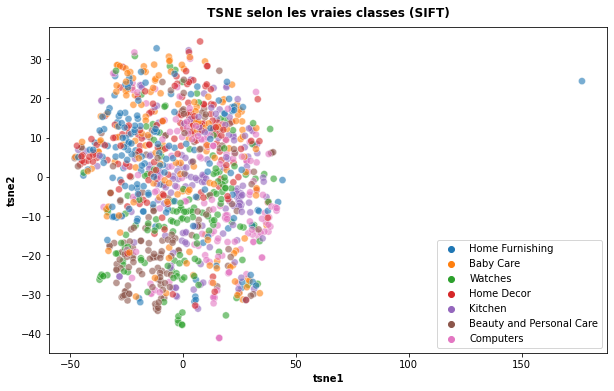

In [23]:
# Visualisation des vrais classes

plt.figure(figsize=(10, 6))

sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="class",
                palette=sns.color_palette('tab10', n_colors=7),
                s=50,
                alpha=0.6,
                data=df_tsne_sift,
                legend="brief")

plt.title('TSNE selon les vraies classes (SIFT)',
          fontsize=12,
          pad=10,
          fontweight='bold')
plt.xlabel('tsne1', fontsize=10, fontweight='bold')
plt.ylabel('tsne2', fontsize=10, fontweight='bold')
plt.legend(prop={'size': 10})

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [24]:
from sklearn import cluster, metrics

cls_sift = cluster.KMeans(n_clusters=7, random_state=6)
cls_sift.fit(X_tsne_sift)

df_tsne_sift["cluster"] = cls_sift.labels_
print(df_tsne_sift.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.05 reste faible

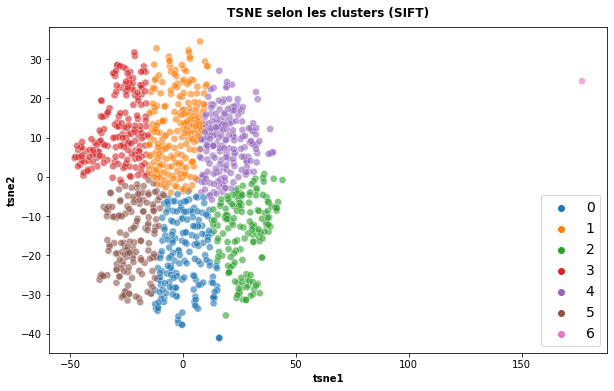

ARI :  0.05602994912388684


In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="cluster",
                palette=sns.color_palette('tab10', n_colors=7),
                s=50,
                alpha=0.6,
                data=df_tsne_sift,
                legend="brief")

plt.title('TSNE selon les clusters (SIFT)',
          fontsize=12,
          pad=10,
          fontweight='bold')
plt.xlabel('tsne1', fontsize=10, fontweight='bold')
plt.ylabel('tsne2', fontsize=10, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

labels = data["categorie_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls_sift.labels_))

In [26]:
df_tsne_sift

,tsne1,tsne2,class,cluster
0,-20.134384,-10.676973,Home Furnishing,5
1,-26.479965,8.249002,Baby Care,3
2,9.760919,29.408133,Baby Care,1
3,-35.593159,8.403221,Home Furnishing,3
4,-26.359806,2.219781,Home Furnishing,3
...,...,...,...,...
1045,-6.164991,-1.592163,Baby Care,1
1046,-8.991332,14.190750,Baby Care,1
1047,-2.035860,18.496693,Baby Care,1
1048,24.113253,-30.142117,Baby Care,2


In [27]:
data_clustered_sift = pd.concat([data, df_tsne_sift], axis=1)
data_clustered_sift.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie_1,tsne1,tsne2,class,cluster
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,-20.134384,-10.676973,Home Furnishing,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,-26.479965,8.249002,Baby Care,3
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,9.760919,29.408133,Baby Care,1
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,-35.593159,8.403221,Home Furnishing,3
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,-26.359806,2.219781,Home Furnishing,3


### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [28]:
data_clustered_sift.groupby("cluster").count()["categorie_1"]

cluster
0    174
1    209
2    152
3    177
4    187
5    150
6      1
Name: categorie_1, dtype: int64

In [29]:
data_clustered_sift['cat_labeled'] = data_clustered_sift["categorie_1"].astype('category').cat.codes

In [30]:
labels = data_clustered_sift['cat_labeled']

In [31]:
conf_mat = metrics.confusion_matrix(labels, cls_sift.labels_)
print(conf_mat)

[[14 37 17 41 29 12  0]
 [44 20  9  9 15 53  0]
 [24 23 51  9 31 12  0]
 [ 8 53  6 41 30 12  0]
 [12 22 15 60 17 23  1]
 [24 39 32 10 39  6  0]
 [48 15 22  7 26 32  0]]


In [32]:
def conf_mat_transform(y_true, y_pred):
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])

    return labels['y_pred_transform']


cls_labels_transform = conf_mat_transform(labels, cls_sift.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[ 0 29 12 41 17 37 14]
 [ 0 15 53  9  9 20 44]
 [ 0 31 12  9 51 23 24]
 [ 0 30 12 41  6 53  8]
 [ 1 17 23 60 15 22 12]
 [ 0 39  6 10 32 39 24]
 [ 0 26 32  7 22 15 48]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       150
           1       0.08      0.10      0.09       150
           2       0.08      0.08      0.08       150
           3       0.23      0.27      0.25       150
           4       0.10      0.10      0.10       150
           5       0.19      0.26      0.22       150
           6       0.28      0.32      0.30       150

    accuracy                           0.16      1050
   macro avg       0.14      0.16      0.15      1050
weighted avg       0.14      0.16      0.15      1050



<AxesSubplot:>

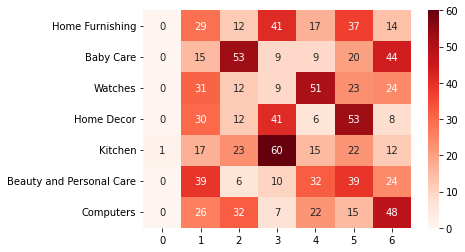

In [33]:
list_labels = data_clustered_sift["categorie_1"].unique()

df_cm = pd.DataFrame(conf_mat,
                     index=[label for label in list_labels],
                     columns=[i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Reds")

# 5. L'Algorithme ORB

## 5.1 Détermination et affichage des descripteurs ORB

La taille de l'image est 486540. 


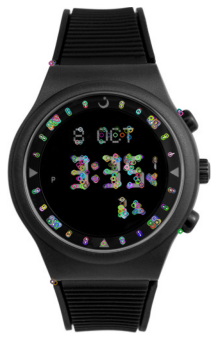

In [34]:
first_image = cv2.imread(path + '41384da51732c0b4df3de8f395714fbb.jpg')
gray = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create()
kp = orb.detect(gray, None)
first_image_gray = cv2.drawKeypoints(gray, kp, first_image)
show_image(first_image_gray, 6)
#cv2.imwrite('first_image_keys_orb.jpg', first_image_gray)

## 5.2. Pré-traitement des images via ORB

In [35]:
import time

temps1 = time.time()

orb_keypoints = []

orb = cv2.ORB_create()

for image_num in range(len(list_photos)):
    if image_num % 100 == 0: print(image_num)
    image = cv2.imread(path + list_photos[image_num], cv2.IMREAD_GRAYSCALE)
    res = cv2.equalizeHist(image)
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1 = time.time() - temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1,
      "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            56.16 secondes


/Users/fyasar/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


## 5.3. Création des clusters de descripteurs

In [36]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster
# Determination number of clusters
temps1 = time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans_orb = cluster.MiniBatchKMeans(n_clusters=k, random_state=0)
kmeans_orb.fit(orb_keypoints_all)

duration1 = time.time() - temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...
temps de traitement kmeans :            32.37 secondes


## 5.4. Création des features des images

In [37]:
# Creation of histograms (features)
temps1 = time.time()


def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans_orb.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0: print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0 / nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(orb_keypoints_by_img):
    if i % 100 == 0: print(i)
    hist = build_histogram(kmeans_orb, image_desc,
                           i)  #calculates the histogram
    hist_vectors.append(hist)  #histogram is the feature vector

im_features_orb = np.asarray(hist_vectors)

duration1 = time.time() - temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.96 secondes


## 5.5 Réductions de dimension

### Réduction de dimension PCA

In [38]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features_orb.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_orb = pca.fit_transform(im_features_orb)
print("Dimensions dataset après réduction PCA : ", feat_pca_orb.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 575)


### Réduction de dimension T-SNE

In [39]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_orb = tsne.fit_transform(feat_pca_orb)

df_tsne_orb = pd.DataFrame(X_tsne_orb[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_orb["class"] = data["categorie_1"]
print(df_tsne_orb.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

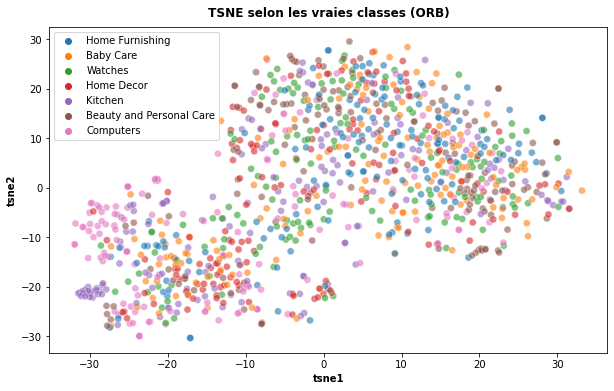

In [40]:
# Visualisation des vrais classes

plt.figure(figsize=(10, 6))

sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="class",
                palette=sns.color_palette('tab10', n_colors=7),
                s=50,
                alpha=0.6,
                data=df_tsne_orb,
                legend="brief")

plt.title('TSNE selon les vraies classes (ORB)',
          fontsize=12,
          pad=10,
          fontweight='bold')
plt.xlabel('tsne1', fontsize=10, fontweight='bold')
plt.ylabel('tsne2', fontsize=10, fontweight='bold')
plt.legend(prop={'size': 10})

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [41]:
from sklearn import cluster, metrics

cls_orb = cluster.KMeans(n_clusters=7, random_state=6)
cls_orb.fit(X_tsne_orb)

df_tsne_orb["cluster"] = cls_orb.labels_
print(df_tsne_orb.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.03 reste faible

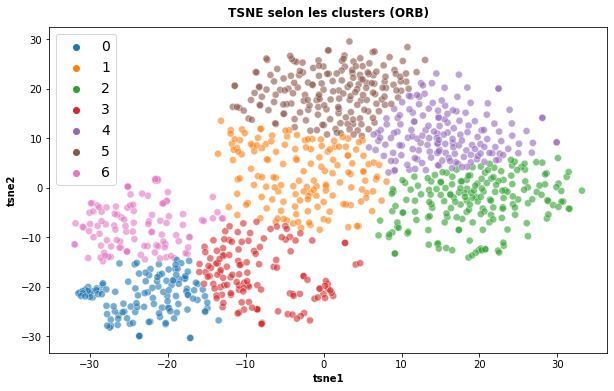

ARI :  0.037565712072002995


In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tsne1",
                y="tsne2",
                hue="cluster",
                palette=sns.color_palette('tab10', n_colors=7),
                s=50,
                alpha=0.6,
                data=df_tsne_orb,
                legend="brief")

plt.title('TSNE selon les clusters (ORB)',
          fontsize=12,
          pad=10,
          fontweight='bold')
plt.xlabel('tsne1', fontsize=10, fontweight='bold')
plt.ylabel('tsne2', fontsize=10, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

labels = data["categorie_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls_orb.labels_))

In [43]:
df_tsne_orb

,tsne1,tsne2,class,cluster
0,0.840186,13.830187,Home Furnishing,5
1,14.475121,23.056005,Baby Care,4
2,5.777999,4.756926,Baby Care,1
3,6.402354,22.711407,Home Furnishing,5
4,12.462134,9.037601,Home Furnishing,4
...,...,...,...,...
1045,26.784119,-2.328032,Baby Care,2
1046,29.891369,0.138850,Baby Care,2
1047,31.461727,3.198093,Baby Care,2
1048,22.996838,-4.210764,Baby Care,2


In [44]:
data_clustered_orb = pd.concat([data, df_tsne_orb], axis=1)
data_clustered_orb

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,categorie_1,tsne1,tsne2,class,cluster
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,0.840186,13.830187,Home Furnishing,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,14.475121,23.056005,Baby Care,4
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,5.777999,4.756926,Baby Care,1
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,6.402354,22.711407,Home Furnishing,5
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,12.462134,9.037601,Home Furnishing,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,26.784119,-2.328032,Baby Care,2
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,29.891369,0.138850,Baby Care,2
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2

In [45]:
data_clustered_orb.groupby("cluster").count()["categorie_1"]

cluster
0    125
1    151
2    187
3    130
4    161
5    184
6    112
Name: categorie_1, dtype: int64

In [46]:
data_clustered_orb['cat_labeled'] = data_clustered_orb["categorie_1"].astype('category').cat.codes

In [47]:
labels = data_clustered_orb['cat_labeled']

In [48]:
conf_mat = metrics.confusion_matrix(labels, cls_orb.labels_)
print(conf_mat)

[[14 20 39 15 30 19 13]
 [12 12 42 10 27 43  4]
 [22 15 17 17 12 12 55]
 [15 28 17 39 13 32  6]
 [10 17 22 13 45 33 10]
 [41 25 18 21 14 14 17]
 [11 34 32 15 20 31  7]]


In [49]:
def conf_mat_transform(y_true, y_pred):
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])

    return labels['y_pred_transform']


cls_labels_transform = conf_mat_transform(labels, cls_orb.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[13 30 19 15 39 20 14]
 [ 4 27 43 10 42 12 12]
 [55 12 12 17 17 15 22]
 [ 6 13 32 39 17 28 15]
 [10 45 33 13 22 17 10]
 [17 14 14 21 18 25 41]
 [ 7 20 31 15 32 34 11]]

              precision    recall  f1-score   support

           0       0.12      0.09      0.10       150
           1       0.17      0.18      0.17       150
           2       0.07      0.08      0.07       150
           3       0.30      0.26      0.28       150
           4       0.12      0.15      0.13       150
           5       0.17      0.17      0.17       150
           6       0.09      0.07      0.08       150

    accuracy                           0.14      1050
   macro avg       0.15      0.14      0.14      1050
weighted avg       0.15      0.14      0.14      1050



<AxesSubplot:>

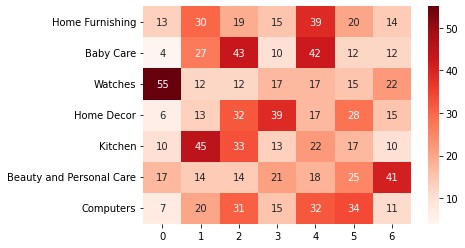

In [50]:
list_labels = data_clustered_orb["categorie_1"].unique()

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds")